In [1]:
# ЗАДАЧА Д006
import numpy as np
import pandas as pd

df = pd.read_csv("C:\\Users\\sergey\\Documents\\2015.csv")

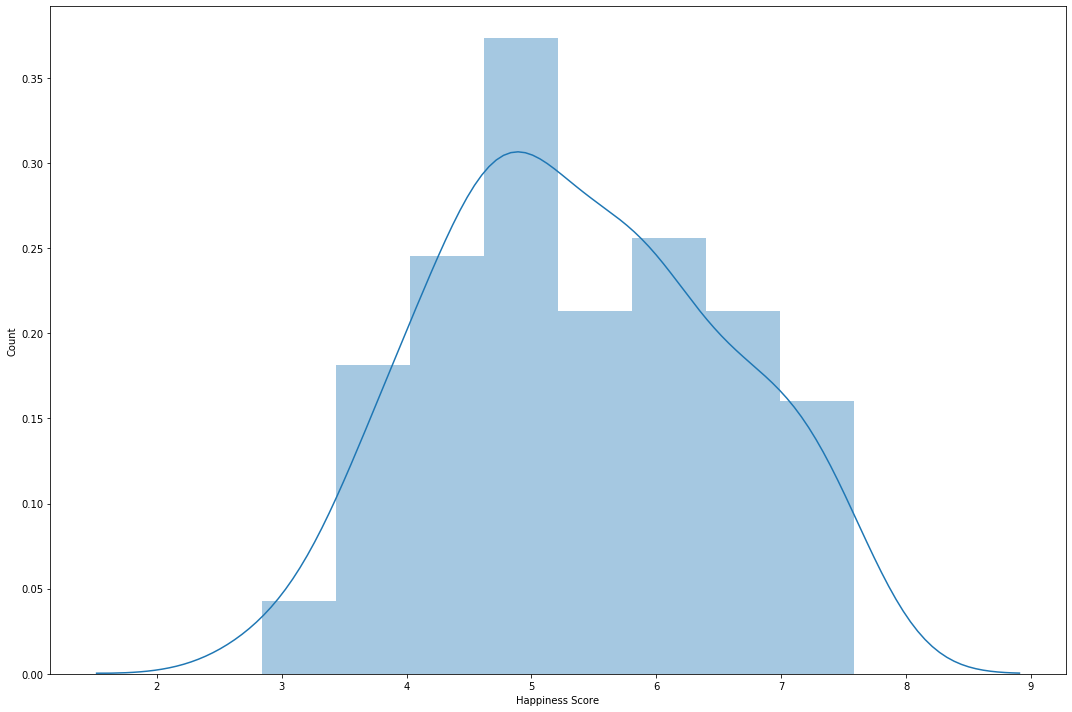

In [14]:
# Для начала посмотрим распределение индекса счастья
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.distplot(df["Happiness Score"])
plt.xlabel("Happiness Score")
plt.ylabel('Count')
plt.tight_layout()

In [3]:
# Очевидно, что Happiness Score зависит от региона страны - особенно для континентальных регионов
df.groupby(["Region"])[["Happiness Score"]].mean()

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [4]:
df["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [15]:
df[df["Happiness Score"]< 6].shape

(114, 12)

In [6]:
df.shape

(158, 12)

In [16]:
# 114/158~0.73 - разделим загруженный датасет на тренировочную и тестовую выборку в соотношении 3:1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

df_target = df[["Happiness Score"]]
df_data = df.copy()
df_data = df_data.drop(df_data.columns[[0, 1, 2, 3]], axis='columns')

df_train_data, df_test_data,df_train_target, df_test_target = train_test_split(df_data, df_target, random_state=42 , test_size=0.25 )
linear_regression = Ridge(random_state=42)
model = linear_regression.fit(df_train_data, df_train_target) # данная модель не учитывает принадлежность к региону

predicted = model.predict(df_test_data)

In [17]:
predictions_ground_truth_df = pd.DataFrame(list(zip(predicted, df_test_target["Happiness Score"])))
predictions_ground_truth_df.columns = ['Prediction', 'Ground truth']
predictions_ground_truth_df.head()

,Prediction,Ground truth
0,[4.157874972250818],4.307
1,[5.995761285033821],5.987
2,[4.303558358196096],4.194
3,[2.9813501823669792],2.905
4,[4.89865937791391],5.057
5,[6.585888159590086],6.574
6,[4.937292162955545],4.898
7,[4.795487051949002],4.876
8,[5.007466696030078],4.949
9,[3.937663799563644],3.931


In [18]:
# Теперь будем учитывать принадлежность к региону:
df_mean =  df.groupby(["Region"])[["Happiness Score"]].mean()
df_mean.rename(columns={"Happiness Score": 'mean_Happiness Score'}, inplace=True)
df_v2 = df.merge(df_mean, how='inner', on='Region')

In [21]:
df_target = df[["Happiness Score"]]
df_data = df_v2.copy()
df_data = df_data.drop(df_data.columns[[0, 1, 2, 3]], axis='columns')

df_train_data, df_test_data,df_train_target, df_test_target = train_test_split(df_data, df_target, random_state=42 , test_size=0.25 )
linear_regression = Ridge(random_state=42)
model_v2 = linear_regression.fit(df_train_data, df_train_target)

predicted_v2 = model_v2.predict(df_test_data)

In [22]:
predictions_ground_truth_df = pd.DataFrame(list(zip(predicted_v2, df_test_target["Happiness Score"])))
predictions_ground_truth_df.columns = ['Prediction', 'Ground truth']
predictions_ground_truth_df.head()

,Prediction,Ground truth
0,[4.21591232380427],4.307
1,[6.277528572508902],5.987
2,[4.190787037195146],4.194
3,[4.403356474287892],2.905
4,[5.110568799433071],5.057


In [26]:
# Как видно, предсказания получаются хуже, чем без учета принадлежности к региону
# Теперь для улучшения предсказаний стандартизуем данные используя StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train_data_v2 = scaler.fit_transform(df_train_data, df_train_target)
df_test_data_v2 = scaler.transform(df_test_data)
model_v2 = linear_regression.fit(df_train_data_v2, df_train_target)

In [27]:
predicted_v2 = model_v2.predict(df_test_data_v2)

In [30]:
predictions_ground_truth_df = pd.DataFrame(list(zip(predicted_v2, df_test_target["Happiness Score"])))
predictions_ground_truth_df.columns = ['Prediction', 'Ground truth']
predictions_ground_truth_df.head(10)

,Prediction,Ground truth
0,[4.312245619722112],4.307
1,[5.990308017380373],5.987
2,[4.198546494672144],4.194
3,[2.9136811336137987],2.905
4,[5.061650615918303],5.057
5,[6.568232541706159],6.574
6,[4.894216071647644],4.898
7,[4.880117011957512],4.876
8,[4.949429084146979],4.949
9,[3.9421859314883463],3.931


In [ ]:
# Теперь ошибка предсказания во 2-3-м знаке после запятой